In [135]:
import numpy as np
import pandas as pd
import seaborn as sns

In [136]:
df = pd.read_excel("Wine_Quality.xlsx")

In [137]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality
0,6.6,0.150,0.32,6.0,0.033,59.0,128.0,0.99192,3.19,0.71,12.1,White,8.0
1,7.3,0.260,0.53,12.7,0.047,60.5,156.0,0.99840,3.06,0.45,9.1,White,6.0
2,6.0,0.270,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,White,5.0
3,5.6,0.190,0.39,1.1,0.043,17.0,67.0,0.99180,3.23,0.53,10.3,White,6.0
4,6.7,0.300,0.29,2.8,0.025,37.0,107.0,0.99159,3.31,0.63,11.3,White,7.0
5,6.0,0.270,0.26,1.3,0.038,32.0,138.0,0.99125,3.46,0.43,11.1,White,6.0
6,6.3,0.200,0.26,1.6,0.027,36.0,141.0,0.99268,3.53,0.56,10.8,White,6.0
7,7.6,0.270,0.29,2.5,0.059,37.0,115.0,0.99328,3.09,0.37,9.8,White,5.0
8,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,Red,5.0
9,6.3,0.270,0.49,1.2,0.063,35.0,92.0,0.99110,3.38,0.42,12.2,White,6.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  wine type             6497 non-null   object 
 12  quality               6497 non-null   float64
dtypes: float64(12), object(1)
memory usage: 660.0+ KB


<li>As the whine type is object, it should be encoded as white as 0 as red as 1.</li>

# Encoding

In [139]:
df.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497,6497.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898,NaN
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,NaN,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,NaN,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,NaN,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,NaN,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,NaN,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,NaN,6.000000


In [140]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine type', 'quality'],
      dtype='object')

In [141]:
wine_type_ind = {'White':0,'Red':1}

In [142]:
df['wine type'] = df['wine type'].map(wine_type_ind)

In [143]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality
0,6.6,0.150,0.32,6.0,0.033,59.0,128.0,0.99192,3.19,0.71,12.1,0,8.0
1,7.3,0.260,0.53,12.7,0.047,60.5,156.0,0.99840,3.06,0.45,9.1,0,6.0
2,6.0,0.270,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,0,5.0
3,5.6,0.190,0.39,1.1,0.043,17.0,67.0,0.99180,3.23,0.53,10.3,0,6.0
4,6.7,0.300,0.29,2.8,0.025,37.0,107.0,0.99159,3.31,0.63,11.3,0,7.0
5,6.0,0.270,0.26,1.3,0.038,32.0,138.0,0.99125,3.46,0.43,11.1,0,6.0
6,6.3,0.200,0.26,1.6,0.027,36.0,141.0,0.99268,3.53,0.56,10.8,0,6.0
7,7.6,0.270,0.29,2.5,0.059,37.0,115.0,0.99328,3.09,0.37,9.8,0,5.0
8,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,1,5.0
9,6.3,0.270,0.49,1.2,0.063,35.0,92.0,0.99110,3.38,0.42,12.2,0,6.0


# Splitting the data set with sklearn

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
y = df['wine type']
x = df.drop(columns = ['wine type'])

In [146]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.150,0.32,6.0,0.033,59.0,128.0,0.99192,3.19,0.71,12.1,8.0
1,7.3,0.260,0.53,12.7,0.047,60.5,156.0,0.99840,3.06,0.45,9.1,6.0
2,6.0,0.270,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5.0
3,5.6,0.190,0.39,1.1,0.043,17.0,67.0,0.99180,3.23,0.53,10.3,6.0
4,6.7,0.300,0.29,2.8,0.025,37.0,107.0,0.99159,3.31,0.63,11.3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.8,0.400,0.29,2.8,0.044,27.0,97.0,0.99040,3.12,0.42,11.2,6.0
6493,7.3,0.400,0.28,6.5,0.037,26.0,97.0,0.99148,3.16,0.58,12.6,7.0
6494,7.1,0.145,0.33,4.6,0.050,33.0,131.0,0.99420,3.28,0.40,9.6,6.0
6495,7.5,0.230,0.30,1.2,0.030,27.0,80.0,0.99192,3.05,0.68,10.5,5.0


In [147]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    1
Name: wine type, Length: 6497, dtype: int64

In [148]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.35,random_state=0,stratify=y)

In [149]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
650,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6.0
5828,6.8,0.21,0.42,1.2,0.045,24.0,126.0,0.99234,3.09,0.87,10.9,6.0
3712,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5.0
5526,7.2,0.35,0.25,5.6,0.032,23.0,120.0,0.99334,2.93,0.66,10.3,7.0
4576,7.3,0.23,0.37,1.9,0.041,51.0,165.0,0.99080,3.26,0.40,12.2,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4676,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,5.0
1024,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9,6.0
5455,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6.0
1315,6.8,0.34,0.27,5.2,0.060,14.0,169.0,0.99252,3.27,0.57,11.6,6.0


In [150]:
Y_train

650     1
5828    0
3712    0
5526    0
4576    0
       ..
4676    1
1024    0
5455    1
1315    0
3400    0
Name: wine type, Length: 4223, dtype: int64

In [151]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2639,6.9,0.16,0.30,9.6,0.057,50.0,185.0,0.99780,3.39,0.38,9.6,6.0
4202,9.6,0.56,0.31,2.8,0.089,15.0,46.0,0.99790,3.11,0.92,10.0,6.0
5850,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5.0
2903,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6.0
4979,6.8,0.32,0.21,2.2,0.044,15.0,68.0,0.99320,3.17,0.39,9.4,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3691,6.2,0.36,0.26,13.2,0.051,54.0,201.0,0.99760,3.25,0.46,9.0,5.0
5129,6.3,0.20,0.40,1.5,0.037,35.0,107.0,0.99170,3.46,0.50,11.4,6.0
5050,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,5.0
3158,6.5,0.25,0.32,9.9,0.045,41.0,128.0,0.99636,3.18,0.52,9.6,6.0


In [152]:
Y_test

2639    0
4202    1
5850    1
2903    1
4979    0
       ..
3691    0
5129    0
5050    1
3158    0
984     0
Name: wine type, Length: 2274, dtype: int64

# EDA

In [153]:
from matplotlib import pyplot as plt
import seaborn as sns

In [154]:
df_train = pd.concat([X_train,Y_train],axis=1)

In [155]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
650,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6.0,1
5828,6.8,0.21,0.42,1.2,0.045,24.0,126.0,0.99234,3.09,0.87,10.9,6.0,0
3712,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5.0,0
5526,7.2,0.35,0.25,5.6,0.032,23.0,120.0,0.99334,2.93,0.66,10.3,7.0,0
4576,7.3,0.23,0.37,1.9,0.041,51.0,165.0,0.99080,3.26,0.40,12.2,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,5.0,1
1024,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9,6.0,0
5455,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6.0,1
1315,6.8,0.34,0.27,5.2,0.060,14.0,169.0,0.99252,3.27,0.57,11.6,6.0,0


In [156]:
df_test = pd.concat([X_test,Y_test],axis=1)

In [157]:
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
2639,6.9,0.16,0.30,9.6,0.057,50.0,185.0,0.99780,3.39,0.38,9.6,6.0,0
4202,9.6,0.56,0.31,2.8,0.089,15.0,46.0,0.99790,3.11,0.92,10.0,6.0,1
5850,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5.0,1
2903,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6.0,1
4979,6.8,0.32,0.21,2.2,0.044,15.0,68.0,0.99320,3.17,0.39,9.4,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,6.2,0.36,0.26,13.2,0.051,54.0,201.0,0.99760,3.25,0.46,9.0,5.0,0
5129,6.3,0.20,0.40,1.5,0.037,35.0,107.0,0.99170,3.46,0.50,11.4,6.0,0
5050,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,5.0,1
3158,6.5,0.25,0.32,9.9,0.045,41.0,128.0,0.99636,3.18,0.52,9.6,6.0,0


/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wine type', ylabel='count'>

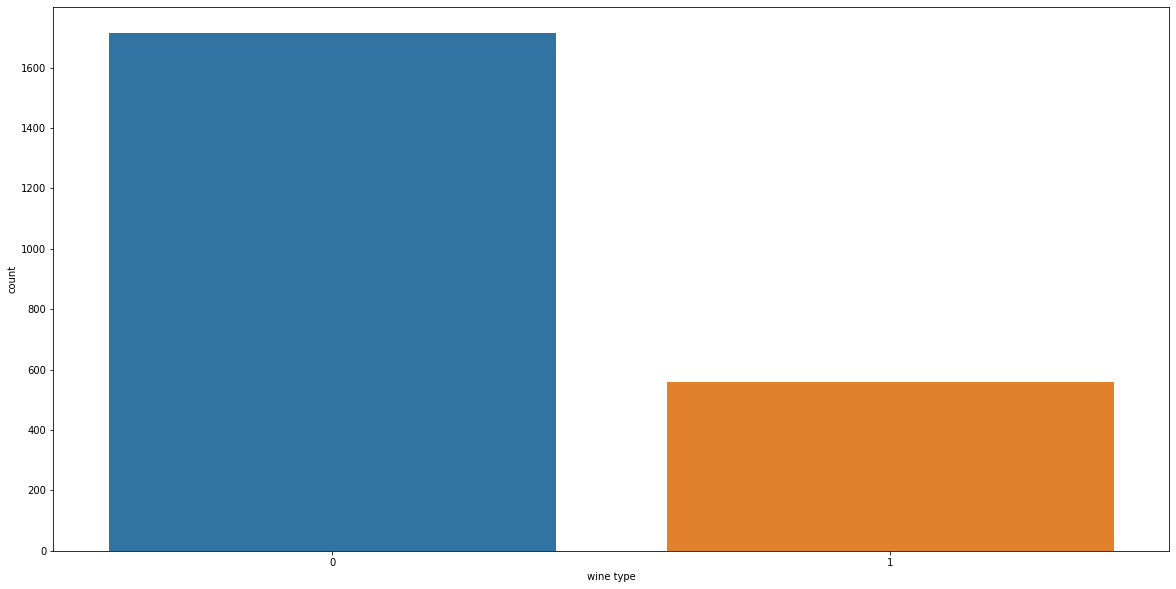

In [158]:
plt.figure(figsize=(20,10))
sns.countplot(df_test["wine type"])

<AxesSubplot:xlabel='quality', ylabel='Count'>

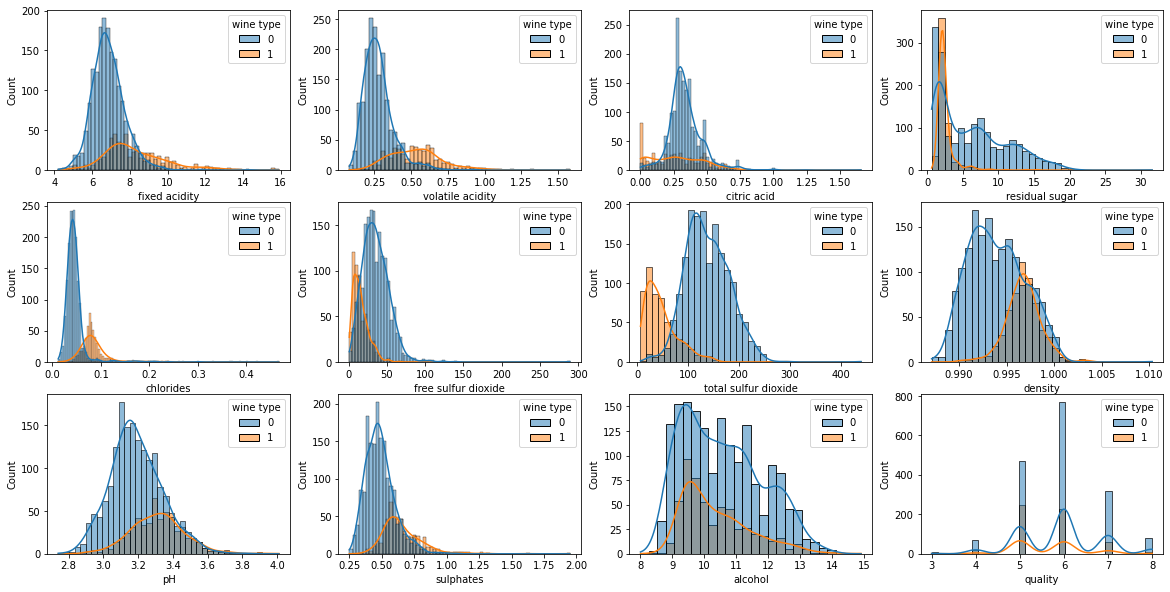

In [159]:
plt.figure(figsize = (20,10))
plt.subplot(3,4,1)
sns.histplot(data=df_test, x="fixed acidity", kde=True,hue='wine type')

plt.subplot(3,4,2)
sns.histplot(data=df_test, x="volatile acidity", kde=True,hue='wine type')

plt.subplot(3,4,3)
sns.histplot(data=df_test, x="citric acid", kde=True,hue='wine type')

plt.subplot(3,4,4)
sns.histplot(data=df_test, x="residual sugar", kde=True,hue='wine type')

plt.subplot(3,4,5)
sns.histplot(data=df_test, x="chlorides", kde=True,hue='wine type')

plt.subplot(3,4,6)
sns.histplot(data=df_test, x="free sulfur dioxide", kde=True,hue='wine type')

plt.subplot(3,4,7)
sns.histplot(data=df_test, x="total sulfur dioxide", kde=True,hue='wine type')

plt.subplot(3,4,8)
sns.histplot(data=df_test, x="density", kde=True,hue='wine type')

plt.subplot(3,4,9)
sns.histplot(data=df_test, x="pH", kde=True,hue='wine type')

plt.subplot(3,4,10)
sns.histplot(data=df_test, x="sulphates", kde=True,hue='wine type')

plt.subplot(3,4,11)
sns.histplot(data=df_test, x="alcohol", kde=True,hue='wine type')

plt.subplot(3,4,12)
sns.histplot(data=df_test, x="quality", kde=True,hue='wine type')






<li>The above observation is not too much conclusive that to classify the wine type into two category</li>
<b>Observation</b>
<li>For fixed acidity feature we can say that for fixed adicity>10 then the wine is red</li>
<li>For Violate acidity feature we can say that violet acidity>0.5 then there is a higher number of red wine</li>
<li>For chlorides feature there is also a classification between red and white wine.</li>
<li>For total sulfur dioxide < 100 there is higher number of red wine.</li>

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wine type', ylabel='count'>

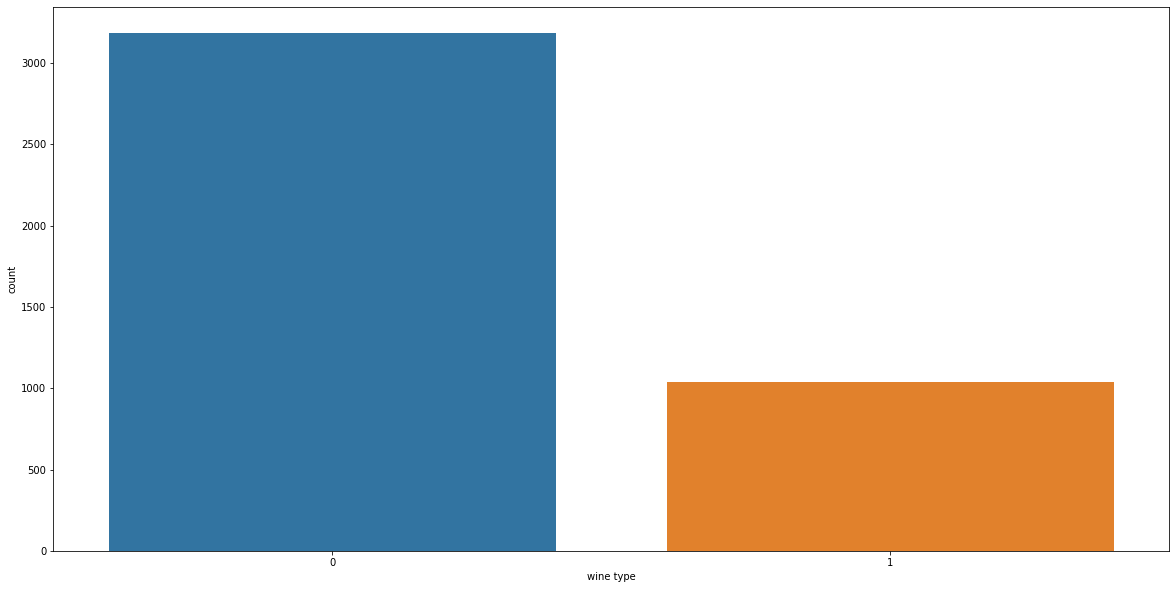

In [160]:
plt.figure(figsize=(20,10))
sns.countplot(df_train["wine type"])

<AxesSubplot:xlabel='quality', ylabel='Count'>

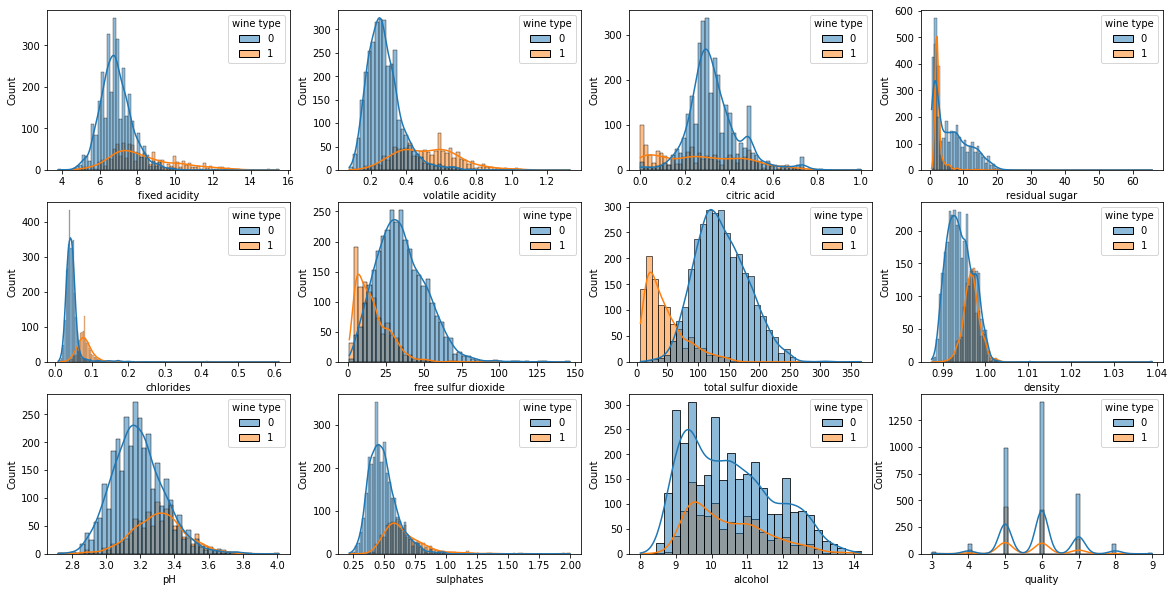

In [161]:
plt.figure(figsize = (20,10))
plt.subplot(3,4,1)
sns.histplot(data=df_train, x="fixed acidity", kde=True,hue='wine type')

plt.subplot(3,4,2)
sns.histplot(data=df_train, x="volatile acidity", kde=True,hue='wine type')

plt.subplot(3,4,3)
sns.histplot(data=df_train, x="citric acid", kde=True,hue='wine type')

plt.subplot(3,4,4)
sns.histplot(data=df_train, x="residual sugar", kde=True,hue='wine type')

plt.subplot(3,4,5)
sns.histplot(data=df_train, x="chlorides", kde=True,hue='wine type')

plt.subplot(3,4,6)
sns.histplot(data=df_train, x="free sulfur dioxide", kde=True,hue='wine type')

plt.subplot(3,4,7)
sns.histplot(data=df_train, x="total sulfur dioxide", kde=True,hue='wine type')

plt.subplot(3,4,8)
sns.histplot(data=df_train, x="density", kde=True,hue='wine type')

plt.subplot(3,4,9)
sns.histplot(data=df_train, x="pH", kde=True,hue='wine type')

plt.subplot(3,4,10)
sns.histplot(data=df_train, x="sulphates", kde=True,hue='wine type')

plt.subplot(3,4,11)
sns.histplot(data=df_train, x="alcohol", kde=True,hue='wine type')

plt.subplot(3,4,12)
sns.histplot(data=df_train, x="quality", kde=True,hue='wine type')

 The above test data observation is not much differnt from train data.

#### Now poceding to perform EDA on both test and train dataset to find the best feature for wine quality

In [162]:
numeric_feature = df_train.select_dtypes(include=[np.number])
numeric_feature.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine type'],
      dtype='object')

In [163]:
correlation = numeric_feature.corr()
print(correlation['quality'].sort_values(ascending=False))


quality                 1.000000
alcohol                 0.436152
citric acid             0.093594
free sulfur dioxide     0.056049
sulphates               0.046732
pH                      0.030984
residual sugar         -0.040857
total sulfur dioxide   -0.048491
fixed acidity          -0.059072
wine type              -0.105480
chlorides              -0.183268
volatile acidity       -0.257652
density                -0.290528
Name: quality, dtype: float64


<AxesSubplot:title={'center':'Corelation of numeric feature with MEDV'}>

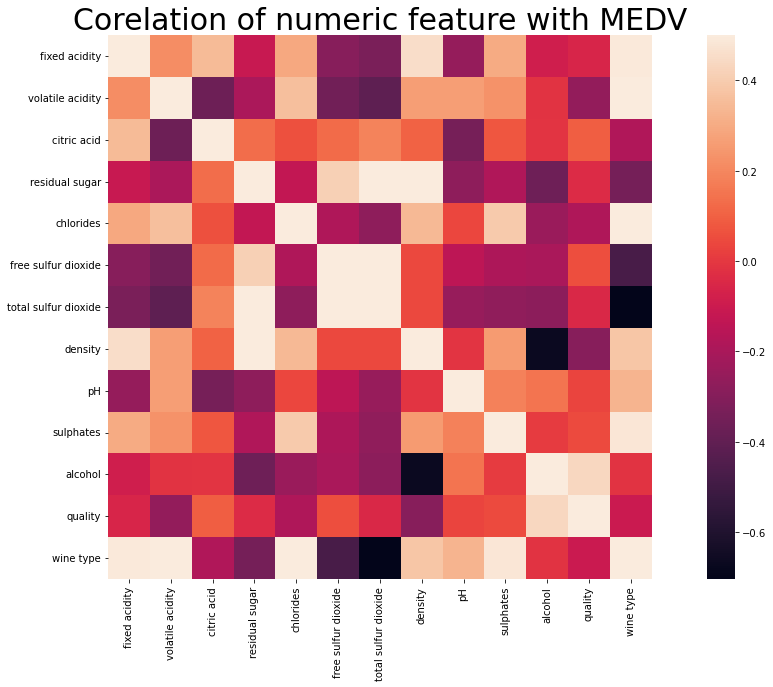

In [164]:
plt.figure(figsize=(20,10))
plt.title("Corelation of numeric feature with MEDV",y=1,size= 30)
sns.heatmap(correlation,square=True,vmax=0.5)

<AxesSubplot:xlabel='wine type', ylabel='quality'>

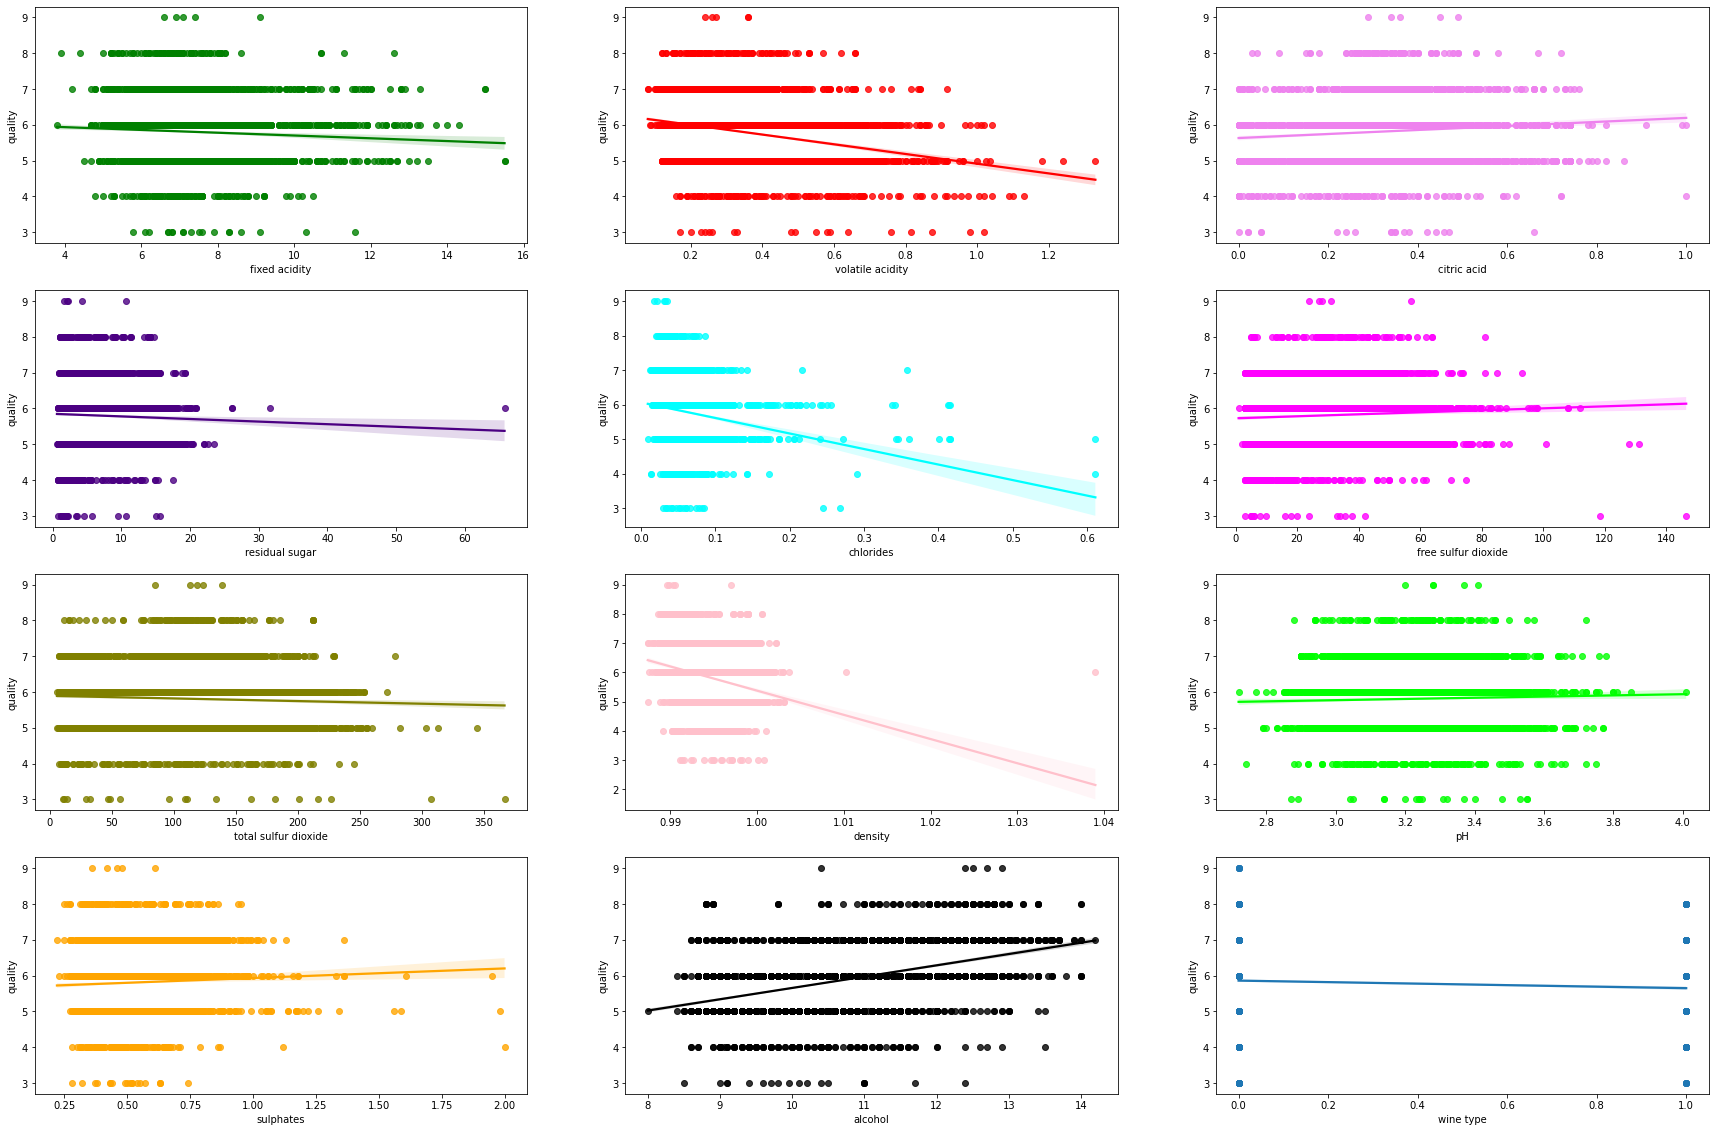

In [165]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(nrows= 4, ncols = 3, figsize=(30,20))
sns.regplot(x='fixed acidity',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax1,color='green')
sns.regplot(x='volatile acidity',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax2,color='red')
sns.regplot(x='citric acid',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax3,color='violet')
sns.regplot(x='residual sugar',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax4,color='indigo')
sns.regplot(x='chlorides',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax5,color='#00FFFF')
sns.regplot(x='free sulfur dioxide',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax6,color='#FF00FF')
sns.regplot(x='total sulfur dioxide',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax7,color='#808000')
sns.regplot(x='density',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax8,color='#FFC0CB')
sns.regplot(x='pH',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax9,color='#00FF00')
sns.regplot(x='sulphates',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax10,color='#FFA500')
sns.regplot(x='alcohol',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax11,color='#000000')
sns.regplot(x='wine type',y='quality',data=df_train,scatter=True,fit_reg=True,ax=ax12)

Based on above those observation we can say the most useful feature is alcohol on train dataset.

In [166]:
numeric_feature = df_test.select_dtypes(include=[np.number])
numeric_feature.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine type'],
      dtype='object')

In [167]:
correlation = numeric_feature.corr()
print(correlation['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.458789
citric acid             0.071514
free sulfur dioxide     0.054393
sulphates               0.023662
pH                     -0.001302
total sulfur dioxide   -0.028422
residual sugar         -0.028821
fixed acidity          -0.109278
wine type              -0.144158
chlorides              -0.231783
volatile acidity       -0.280110
density                -0.333827
Name: quality, dtype: float64


<AxesSubplot:title={'center':'Corelation of numeric feature with MEDV'}>

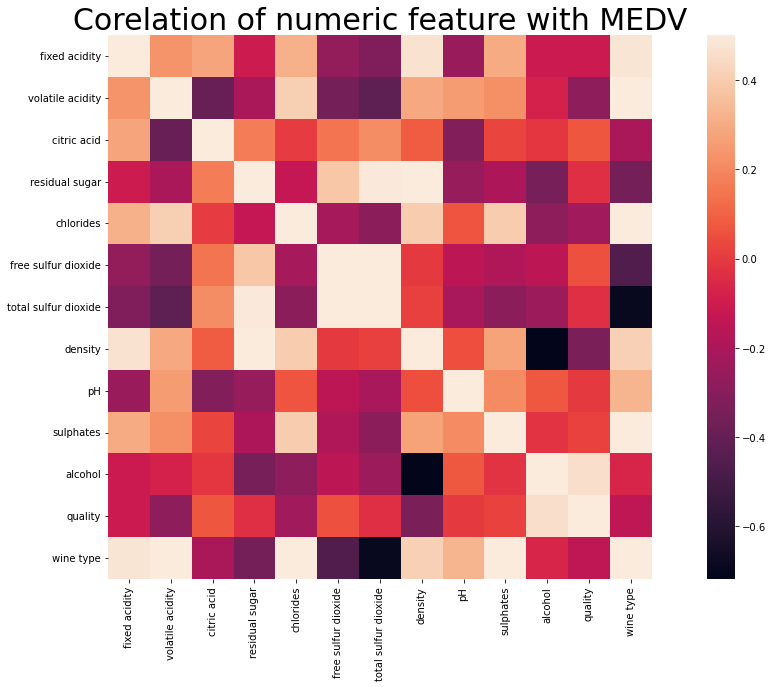

In [168]:
plt.figure(figsize=(20,10))
plt.title("Corelation of numeric feature with MEDV",y=1,size= 30)
sns.heatmap(correlation,square=True,vmax=0.5)

<AxesSubplot:xlabel='wine type', ylabel='quality'>

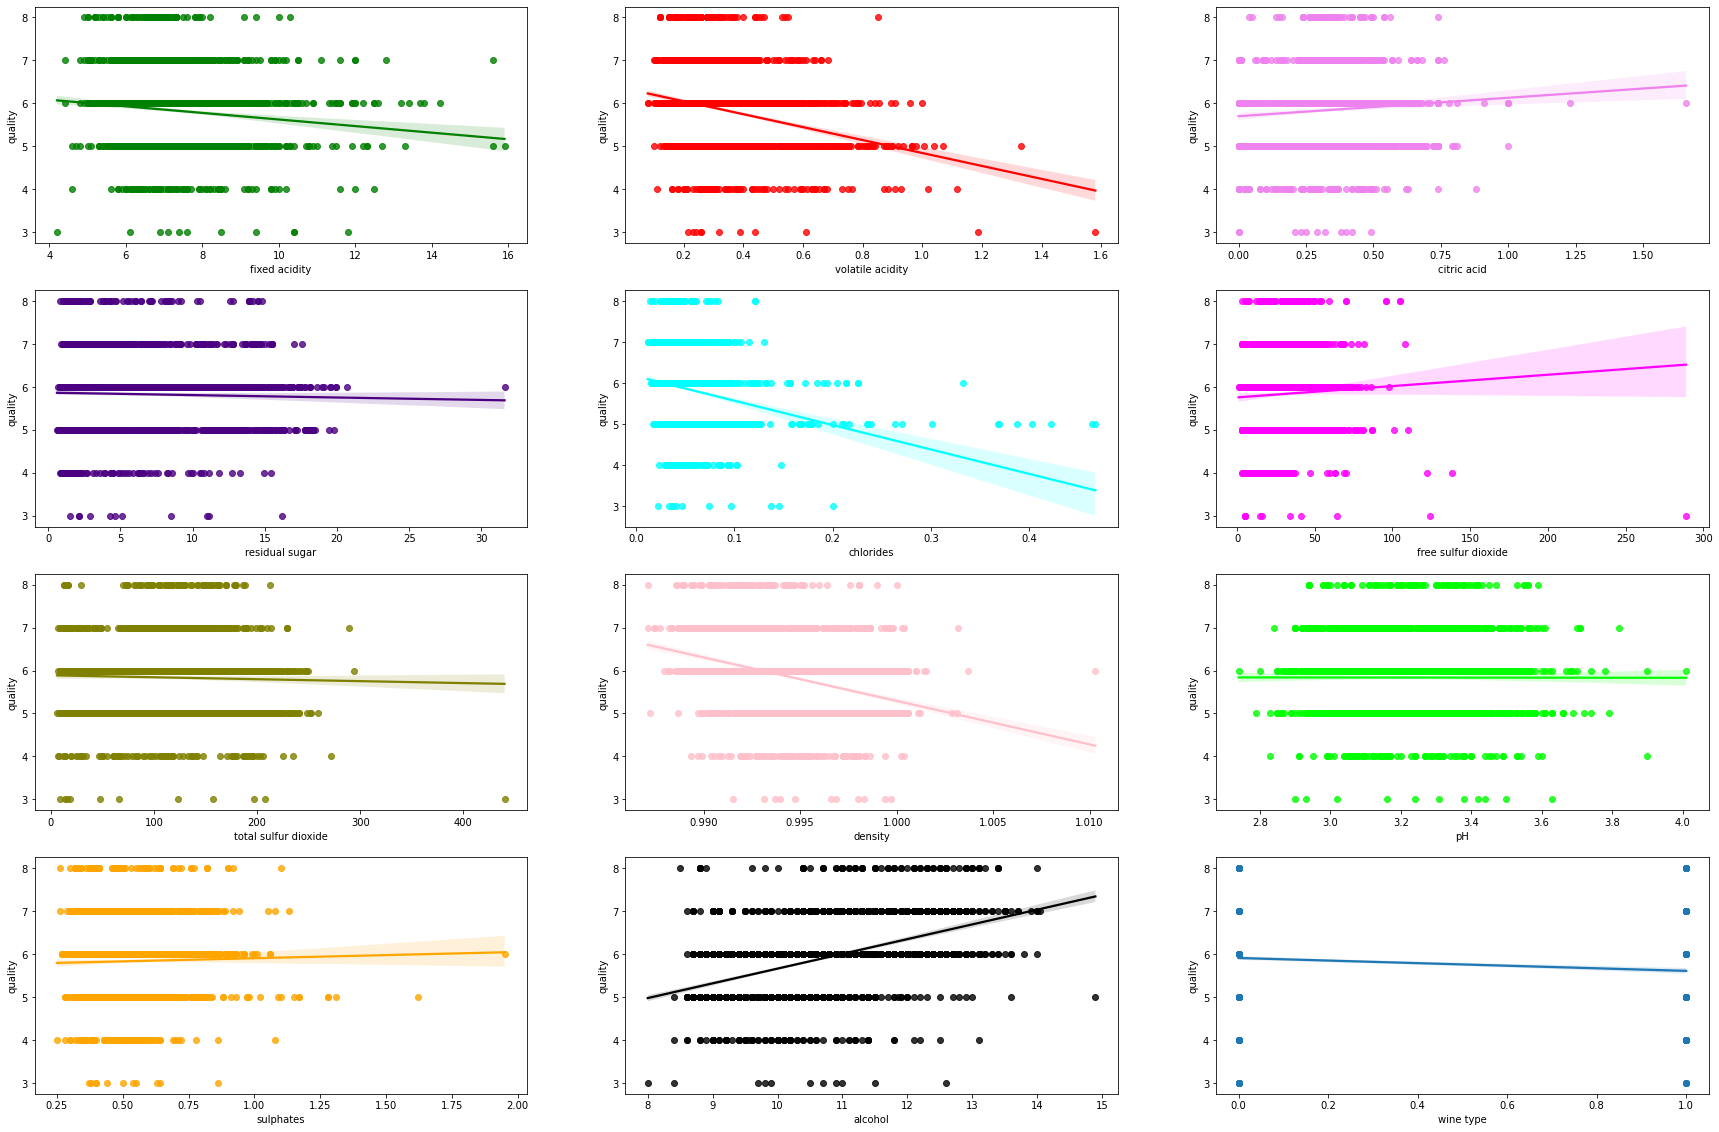

In [169]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(nrows= 4, ncols = 3, figsize=(30,20))
sns.regplot(x='fixed acidity',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax1,color='green')
sns.regplot(x='volatile acidity',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax2,color='red')
sns.regplot(x='citric acid',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax3,color='violet')
sns.regplot(x='residual sugar',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax4,color='indigo')
sns.regplot(x='chlorides',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax5,color='#00FFFF')
sns.regplot(x='free sulfur dioxide',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax6,color='#FF00FF')
sns.regplot(x='total sulfur dioxide',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax7,color='#808000')
sns.regplot(x='density',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax8,color='#FFC0CB')
sns.regplot(x='pH',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax9,color='#00FF00')
sns.regplot(x='sulphates',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax10,color='#FFA500')
sns.regplot(x='alcohol',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax11,color='#000000')
sns.regplot(x='wine type',y='quality',data=df_test,scatter=True,fit_reg=True,ax=ax12)

Based on above those observation we can say the most useful feature is alcohol on test dataset also.

#### Deviding the train and test data set for reggresion and classification.

In [170]:
train_dfr = df_train
train_dfc = df_train
test_dfr = df_test
test_dfc = df_test

In [171]:
train_dfc['quality level']=[1 if i > 5 else 0 for i in train_dfc.quality]
test_dfc['quality level']=[1 if i > 5 else 0 for i in test_dfc.quality]


In [172]:
train_dfc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality level
650,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6.0,1,1
5828,6.8,0.21,0.42,1.2,0.045,24.0,126.0,0.99234,3.09,0.87,10.9,6.0,0,1
3712,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5.0,0,0
5526,7.2,0.35,0.25,5.6,0.032,23.0,120.0,0.99334,2.93,0.66,10.3,7.0,0,1
4576,7.3,0.23,0.37,1.9,0.041,51.0,165.0,0.99080,3.26,0.40,12.2,8.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,5.0,1,0
1024,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9,6.0,0,1
5455,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6.0,1,1
1315,6.8,0.34,0.27,5.2,0.060,14.0,169.0,0.99252,3.27,0.57,11.6,6.0,0,1


In [173]:
train_dfc = train_dfc.drop(['quality'],axis=1)
test_dfc = test_dfc.drop(['quality'],axis=1)

In [174]:
train_dfc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality level
650,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,1,1
5828,6.8,0.21,0.42,1.2,0.045,24.0,126.0,0.99234,3.09,0.87,10.9,0,1
3712,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,0,0
5526,7.2,0.35,0.25,5.6,0.032,23.0,120.0,0.99334,2.93,0.66,10.3,0,1
4576,7.3,0.23,0.37,1.9,0.041,51.0,165.0,0.99080,3.26,0.40,12.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,1,0
1024,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9,0,1
5455,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,1,1
1315,6.8,0.34,0.27,5.2,0.060,14.0,169.0,0.99252,3.27,0.57,11.6,0,1


In [175]:
test_dfc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality level
2639,6.9,0.16,0.30,9.6,0.057,50.0,185.0,0.99780,3.39,0.38,9.6,0,1
4202,9.6,0.56,0.31,2.8,0.089,15.0,46.0,0.99790,3.11,0.92,10.0,1,1
5850,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,1,0
2903,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,1,1
4979,6.8,0.32,0.21,2.2,0.044,15.0,68.0,0.99320,3.17,0.39,9.4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,6.2,0.36,0.26,13.2,0.051,54.0,201.0,0.99760,3.25,0.46,9.0,0,0
5129,6.3,0.20,0.40,1.5,0.037,35.0,107.0,0.99170,3.46,0.50,11.4,0,1
5050,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,1,0
3158,6.5,0.25,0.32,9.9,0.045,41.0,128.0,0.99636,3.18,0.52,9.6,0,1


## Decision Tree Classifier

In [176]:
from sklearn import tree
from sklearn.metrics import recall_score, confusion_matrix, classification_report

In [177]:
y1_train = train_dfc['quality level']
x1_train = train_dfc.drop(columns = ['quality level'])

In [178]:
y1_test = test_dfc['quality level']
x1_test = test_dfc.drop(columns = ['quality level'])

In [179]:
model = tree.DecisionTreeClassifier()

In [180]:
model.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [181]:
Y_test_pred = model.predict(x1_test) 

<AxesSubplot:>

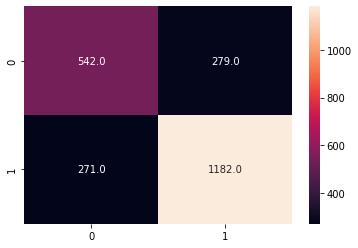

In [182]:
sns.heatmap(confusion_matrix(Y_test_pred,y1_test), annot = True, fmt = '0.1f')

In [183]:
print(classification_report(Y_test_pred,y1_test))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       821
           1       0.81      0.81      0.81      1453

    accuracy                           0.76      2274
   macro avg       0.74      0.74      0.74      2274
weighted avg       0.76      0.76      0.76      2274



# Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
lr = LogisticRegression(penalty = 'l2', random_state = 0)

In [186]:
y1_train_reg = train_dfr['quality']
x1_train_reg = train_dfr.drop(columns = ['quality'])

In [187]:
y1_test_reg = test_dfr['quality']
x1_test_reg = test_dfr.drop(columns = ['quality'])

In [188]:
lr.fit(x1_train_reg, y1_train_reg)
Y_test_pred_lr = lr.predict(x1_test_reg)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

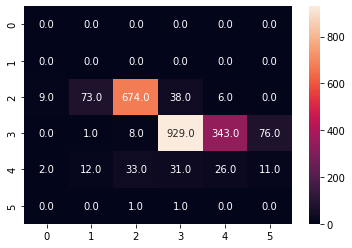

In [189]:
sns.heatmap(confusion_matrix(Y_test_pred_lr, y1_test_reg), annot = True, fmt = '0.1f')

In [190]:
print(classification_report(Y_test_pred_lr, y1_test_reg))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.94      0.84      0.89       800
         6.0       0.93      0.68      0.79      1357
         7.0       0.07      0.23      0.11       115
         8.0       0.00      0.00      0.00         2

    accuracy                           0.72      2274
   macro avg       0.32      0.29      0.30      2274
weighted avg       0.89      0.72      0.79      2274



/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
